## OBJECTIVES

- Comparing the health impacts of different scenarios related to air pollution in different years and age groups to inform effective policymaking.
- Modeling how changes in air pollution levels might affect different diseases or health outcomes over time in a particular area or community

- This study estimates the long-term health impacts of exposure to air pollution in 
London from 2016 to 2050 for three scenarios: a baseline scenario where pollution 
remains at 2016 levels; a “ULEZ” scenario which models the health benefits of the 
central London Ultra Low Emission Zone, expansion to the North and South circular 
roads and tightening of the emissions standards for the Londonwide Low Emission 
Zone for heavy vehicles; and a scenario which models the health benefits of all the 
policies included in the London Environment Strategy.

1st Scenario:  The baseline scenario assumes air pollution levels remain at 2016 levels throughout the period to 2050.
2nd Scenario:  The Ultra Low Emission Zone (ULEZ) includes modelled air quality improvements resulting from the introduction of the central ULEZ in 2019, the tightening of the     restrictions of the Low Emission Zone (LEZ) in 2020, and the expansion of the ULEZ in 2021, as well as additional policy measures in the period 2016-2024.
3rd Scenario:  The London Environment Strategy (LES) scenario which includes modelled air quality improvements as a result of the central ULEZ, LEZ tightening and ULEZ expansion, as well as those resulting from additional policies in the LES over the period 2025-2050. 
4th Scenario: A final scenario was run which reduces exposure to non-anthropogenic levels for the whole population to compute the total number of new diseases attributable man made to air pollution.


In [1]:
import pandas as pd
import os
import pandas as pd
import seaborn as sns # new library
import matplotlib.pyplot as plt
import numpy as np

#Load Data 

df = pd.read_excel('london_incidence_data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6440 entries, 0 to 6439
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Scenario   6440 non-null   int64 
 1   Year       6440 non-null   int64 
 2   Disease    6440 non-null   object
 3   AgeGroup   6440 non-null   object
 4   Incidence  6440 non-null   int64 
 5   95% CL     6440 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 302.0+ KB


## Basic Checks and exploratory analysis

In [2]:

print(df.describe(include='all'))

           Scenario         Year       Disease AgeGroup     Incidence  \
count   6440.000000  6440.000000          6440     6440   6440.000000   
unique          NaN          NaN            10        5           NaN   
top             NaN          NaN  adult asthma    total           NaN   
freq            NaN          NaN           700     1400           NaN   
mean       1.500000  2033.000000           NaN      NaN   4678.073758   
std        1.118121    10.100289           NaN      NaN  11250.245015   
min        0.000000  2016.000000           NaN      NaN      0.000000   
25%        0.750000  2024.000000           NaN      NaN      0.000000   
50%        1.500000  2033.000000           NaN      NaN    942.000000   
75%        2.250000  2042.000000           NaN      NaN   4450.250000   
max        3.000000  2050.000000           NaN      NaN  80583.000000   

             95% CL  
count   6440.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean      22.

In [3]:
df.head(20)

,Scenario,Year,Disease,AgeGroup,Incidence,95% CL
0,0,2016,adult asthma,0-5,0,0
1,0,2016,adult asthma,06-17,0,0
2,0,2016,adult asthma,18-64,4500,34
3,0,2016,adult asthma,65+,788,1
4,0,2016,adult asthma,total,5288,34
5,0,2016,childhood asthma,0-5,8526,67
6,0,2016,childhood asthma,06-17,9023,67
7,0,2016,childhood asthma,18-64,0,0
8,0,2016,childhood asthma,65+,0,0
9,0,2016,childhood asthma,total,17549,68


## Analysis of base Scenario - No action performed by Gov

In [4]:
baseline_london = df[df['Scenario'] == 2]
baseline_london

,Scenario,Year,Disease,AgeGroup,Incidence,95% CL
3220,2,2016,adult asthma,0-5,0,0
3221,2,2016,adult asthma,06-17,0,0
3222,2,2016,adult asthma,18-64,4504,34
3223,2,2016,adult asthma,65+,787,1
3224,2,2016,adult asthma,total,5291,34
...,...,...,...,...,...,...
4825,2,2050,stroke,06-17,34,0
4826,2,2050,stroke,18-64,740,0
4827,2,2050,stroke,65+,2882,30
4828,2,2050,stroke,total,3660,30


In [5]:
baseline_london['Year'] = pd.to_datetime(baseline_london['Year'], format='%Y')

C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_47588\4050844522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline_london['Year'] = pd.to_datetime(baseline_london['Year'], format='%Y')


In [6]:
# Missing values

print('London NO2',df.isnull().sum())


London NO2 Scenario     0
Year         0
Disease      0
AgeGroup     0
Incidence    0
95% CL       0
dtype: int64


In [7]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [8]:
diseases_no2 = df['Disease'].unique()
diseases_no2

array(['adult asthma', 'childhood asthma',
       'chronic obstructive pulmonary disease', 'coronary heart disease',
       'dementia', 'diabetes', 'low birth weight', 'lung cancer',
       'stroke', 'total'], dtype=object)

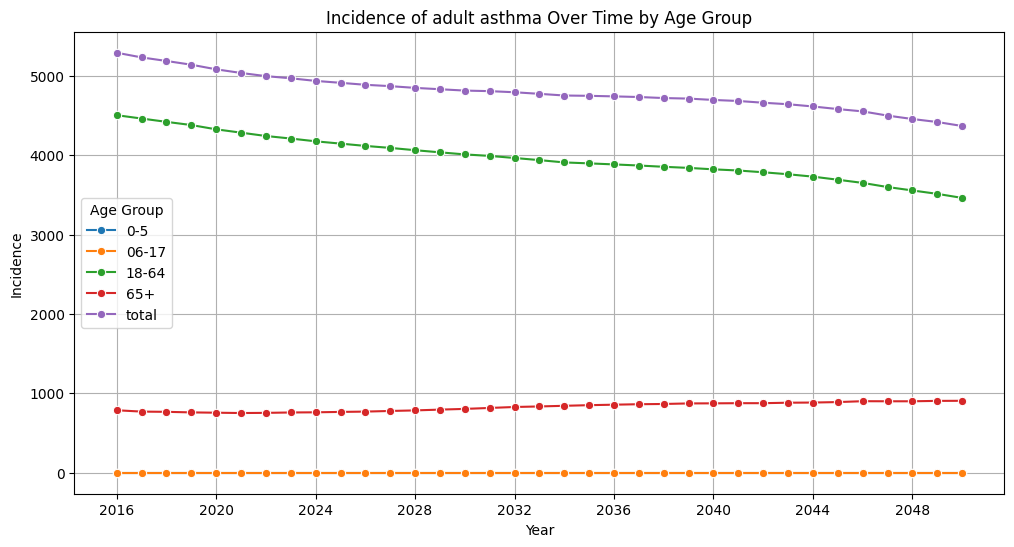

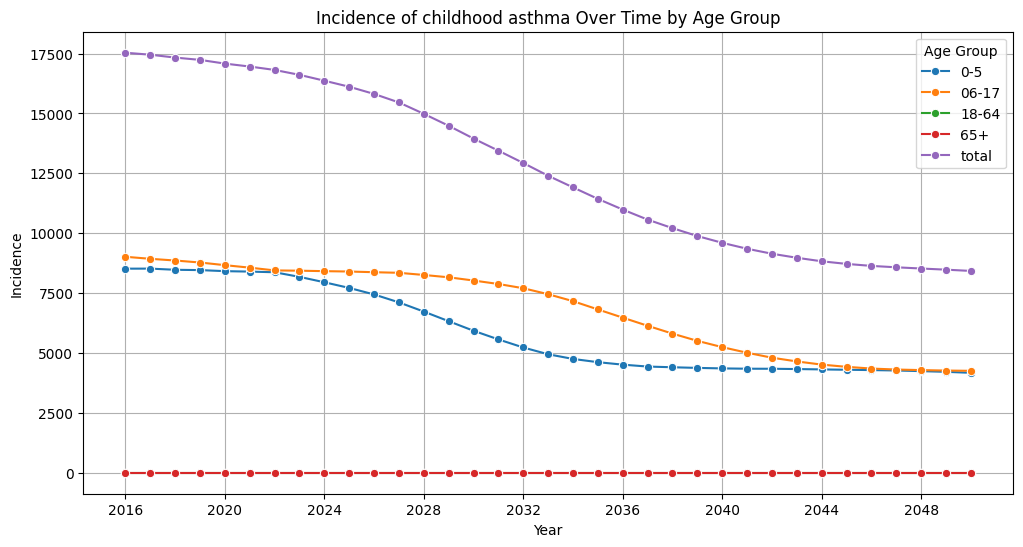

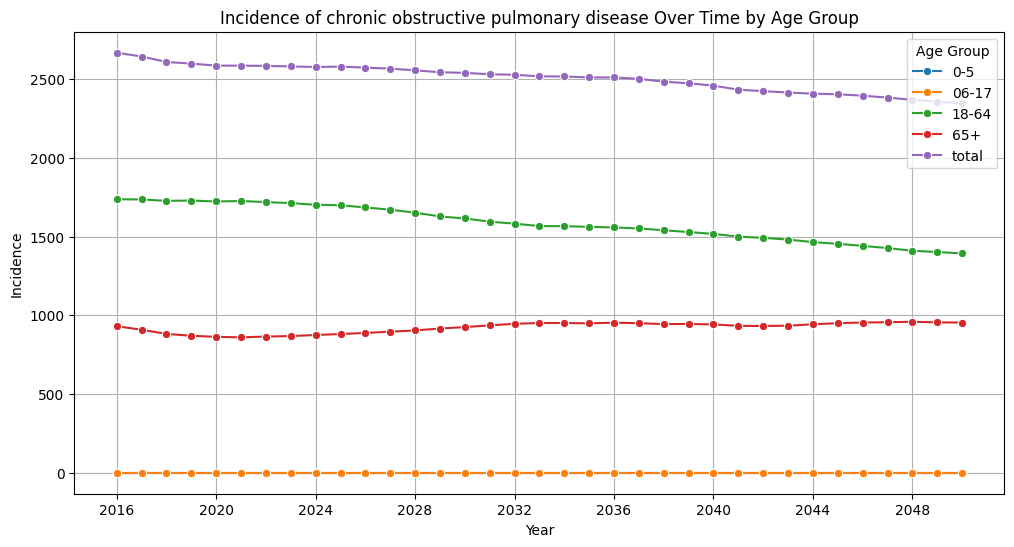

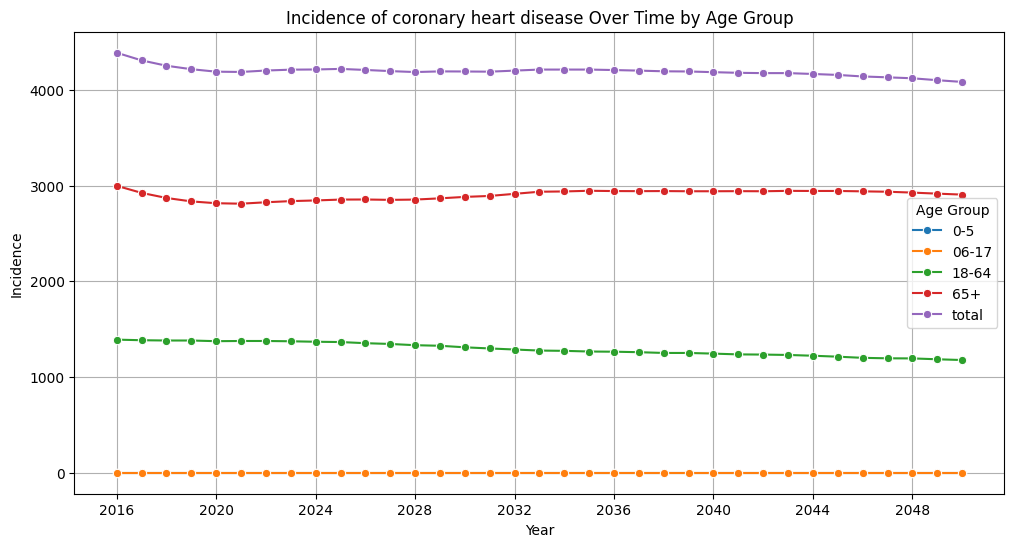

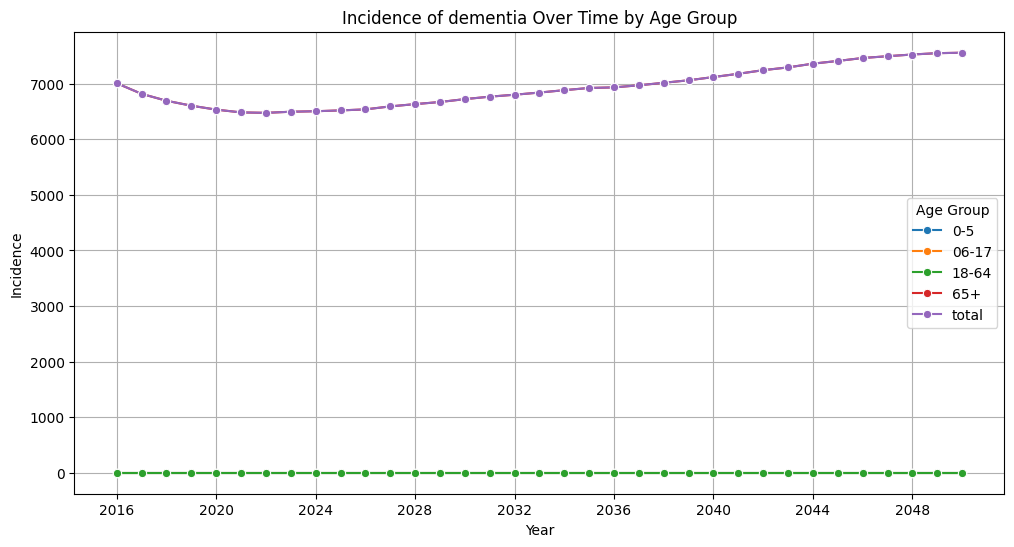

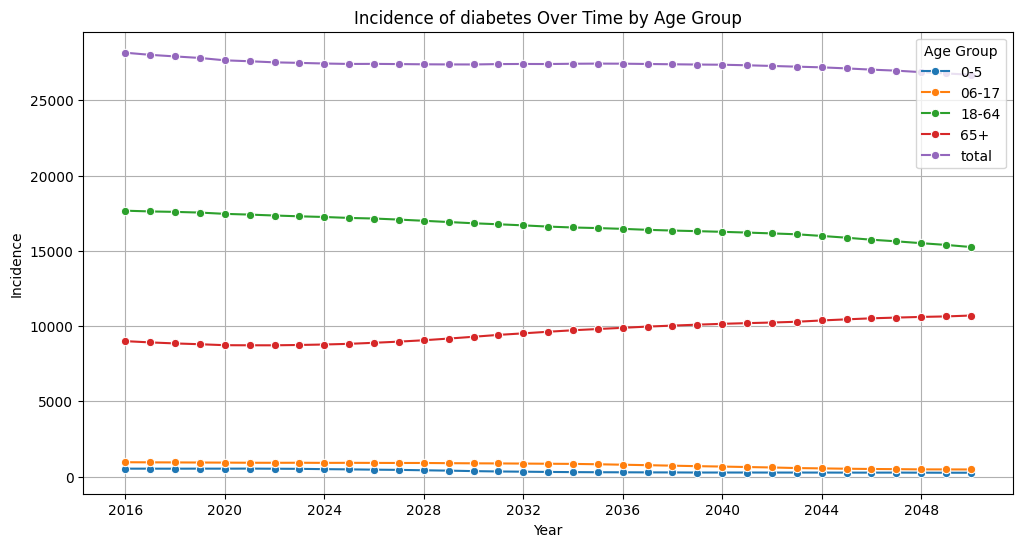

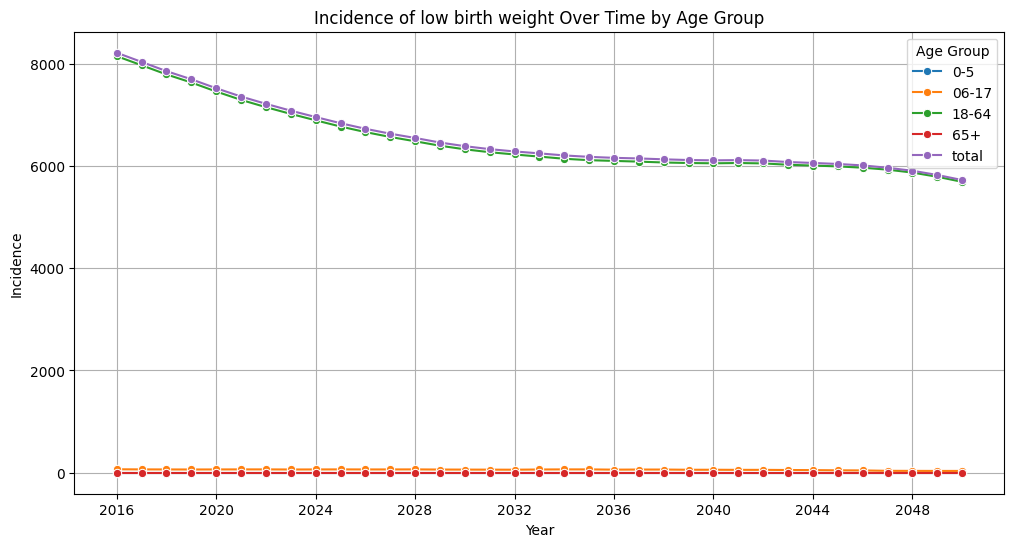

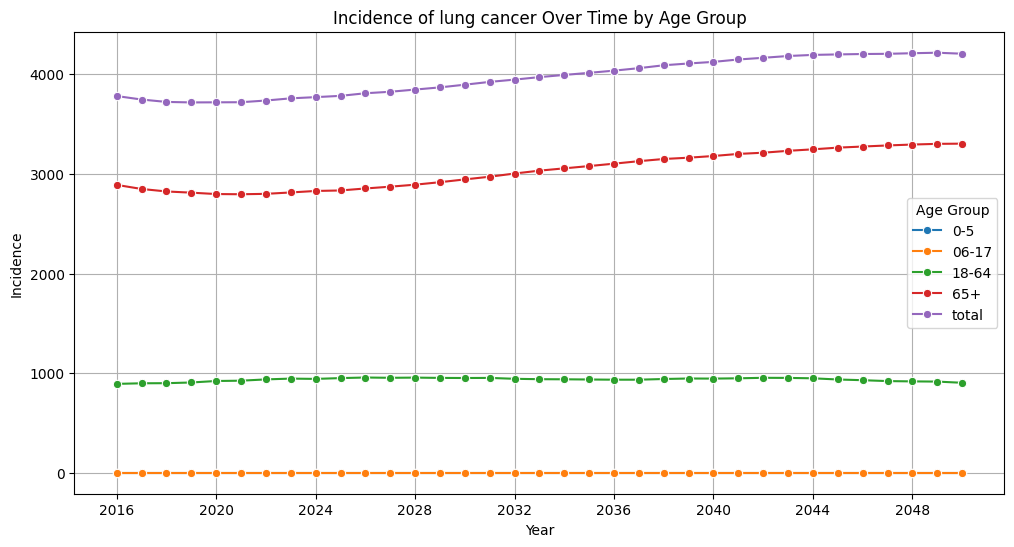

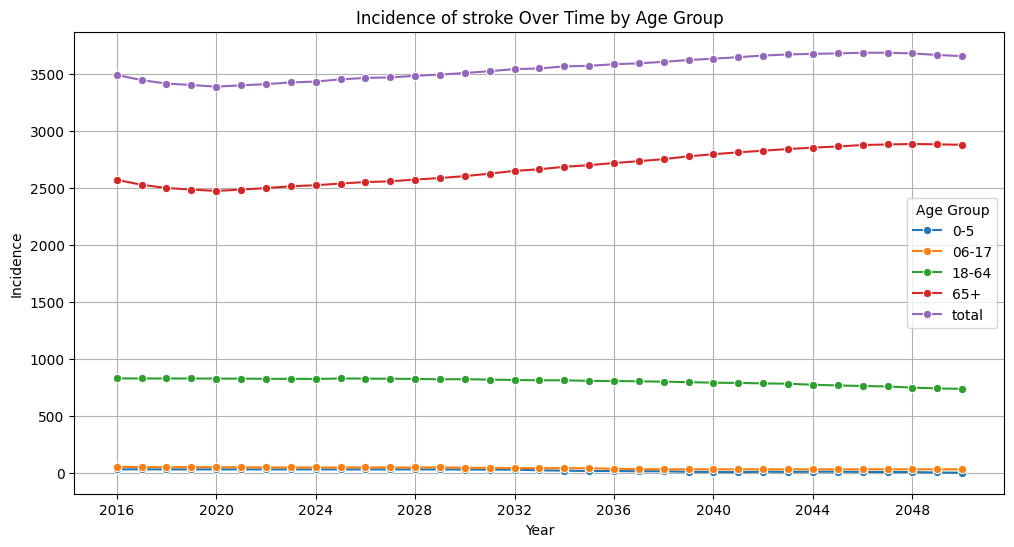

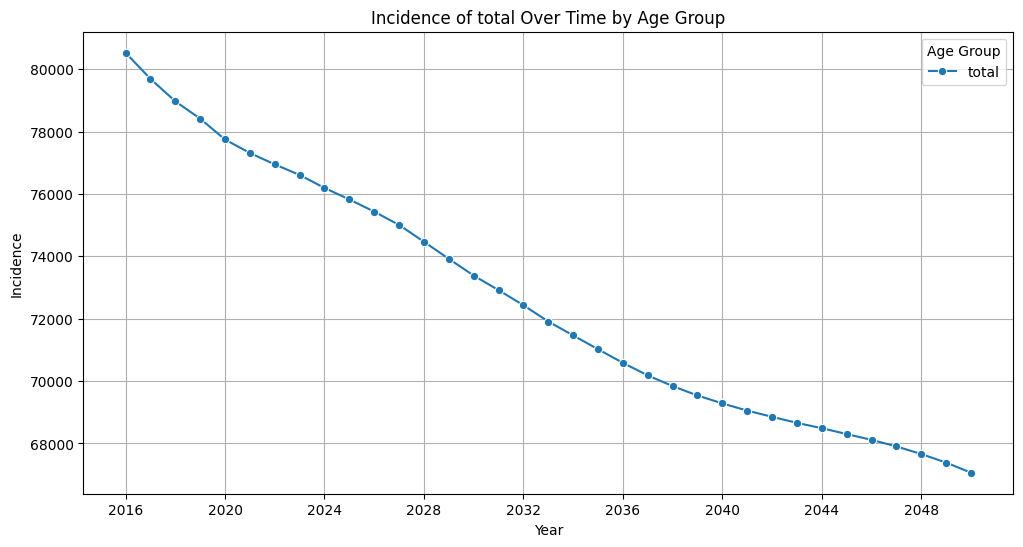

In [9]:
for disease in diseases_no2:
    disease_no2 = baseline_london[baseline_london['Disease'] == disease]
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=disease_no2, x='Year', y='Incidence', hue='AgeGroup', marker='o')
    
    plt.title(f'Incidence of {disease} Over Time by Age Group')
    plt.xlabel('Year')
    plt.ylabel('Incidence')
    plt.legend(title='Age Group')
    plt.grid(True)
    plt.show()

C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_47588\3278503608.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_selected_years = baseline_london[baseline_london['Year'].isin(['2016', '2050'])]


<Figure size 1200x800 with 0 Axes>

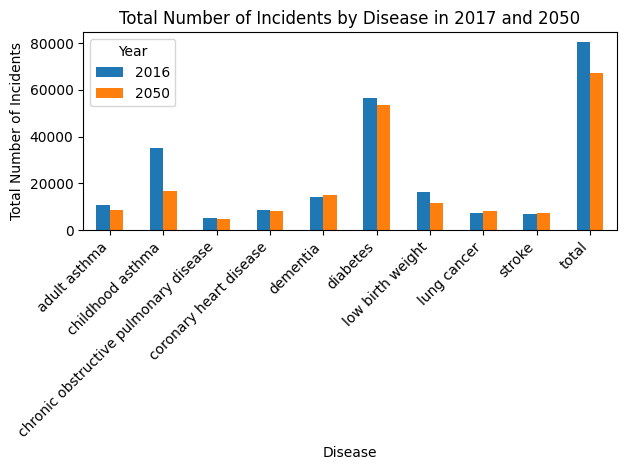

In [10]:
df_selected_years = baseline_london[baseline_london['Year'].isin(['2016', '2050'])]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2017 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [11]:
grouped_data.head(100)

Year,2016-01-01,2050-01-01
Disease,,
adult asthma,10582,8736
childhood asthma,35068,16848
chronic obstructive pulmonary disease,5336,4694
coronary heart disease,8774,8164
dementia,14018,15116
diabetes,56308,53386
low birth weight,16422,11444
lung cancer,7564,8414
stroke,6990,7320


In [12]:
# Total number of incidents for each disease in 2016 and 2050
incidents_2016 = grouped_data['2016-01-01']
incidents_2050 = grouped_data['2050-01-01']

# Percentage increase for each disease
percentage_increase = ((incidents_2050 - incidents_2016) / incidents_2016) * 100

print("Percentage increase of incidents by disease between 2016 and 2050:")
print(percentage_increase)


Percentage increase of incidents by disease between 2016 and 2050:
Disease
adult asthma                            -17.444717
childhood asthma                        -51.956199
chronic obstructive pulmonary disease   -12.031484
coronary heart disease                   -6.952359
dementia                                  7.832786
diabetes                                 -5.189316
low birth weight                        -30.312995
lung cancer                              11.237441
stroke                                    4.721030
total                                   -16.726478
dtype: float64


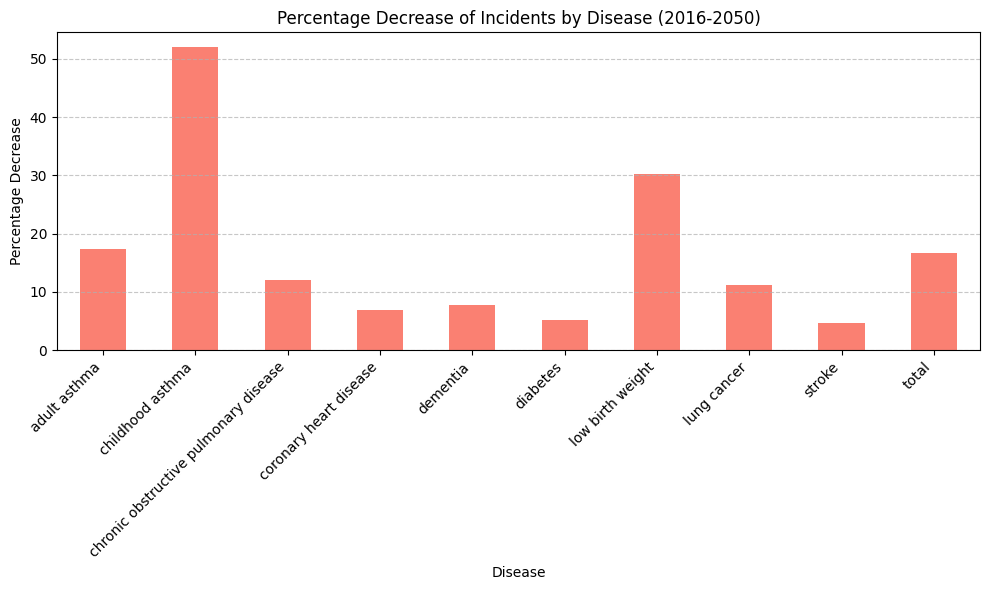

In [13]:
percentage_decrease = percentage_increase.abs()

plt.figure(figsize=(10, 6))
percentage_decrease.plot(kind='bar', color='salmon')
plt.title('Percentage Decrease of Incidents by Disease (2016-2050)')
plt.xlabel('Disease')
plt.ylabel('Percentage Decrease')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()